# Practice Lab: Linear Regression
Welcome to your first practice lab! In this lab, you will implement linear regression with one variable to predict profits for a restaurant fanchise# 

# 1 - Package

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
from public_tests import * 
%matplotlib inline

# 2 - Problem Statement
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet
- You would like to expand your business to cities that may have your restaurant higher profits
- The chain already has restaurant in various cities and you have data for profits and populations from the cities
- You also have data on cities that are candidates for a new restaurant
 * For these cities, you have the city populatuion
 Can you use the data to help you identity which cities may potentially give your business higher profits?

# 3 - Dataset
you will start by loading the dataset for this task

In [5]:
# load the dataset
x_train, y_train = load_data()

# View the variables 

In [6]:
print("Type of x_train: ", type(x_train))
print("First 5 elements of x_train are: \n", x_train[:5])

Type of x_train:  <class 'numpy.ndarray'>
First 5 elements of x_train are: 
 [6.1101 5.5277 8.5186 7.0032 5.8598]


x_train is a numpy array that contains decimal values that are all greater than zero
- These values represent the coty population times 10,000

In [7]:
print("Type of x_train: ", type(y_train))
print("First 5 elements of x_train are: \n", y_train[:5])

Type of x_train:  <class 'numpy.ndarray'>
First 5 elements of x_train are: 
 [17.592   9.1302 13.662  11.854   6.8233]


In [8]:
# Check the dimensions of your variables 
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Number of training examples (m): {len(x_train)}")

Shape of x_train: (97,)
Shape of y_train: (97,)
Number of training examples (m): 97


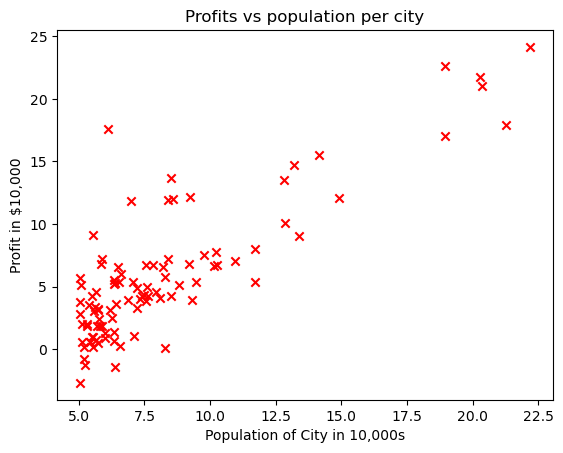

In [9]:
# Visualize your data
# Create a scatter plot of the data. To change the markers to red "x"
plt.scatter(x_train, y_train, marker='x', c='r')

# Set the title
plt.title("Profits vs population per city")
# Set the y_axis label
plt.ylabel("Profit in $10,000")
# Set the x_axis label
plt.xlabel("Population of City in 10,000s")
plt.show()

# Goals
Build a linear regression model to fit the data
Then put a new city's population, and have the model estimate your restaurant's potential monthly profits for that city

In [10]:
# UNQ_C1
# GRADED FUNCTION: compute_cost
def compute_cost(x, y, w, b):
    # number of training examples
    m = x.shape[0]
    
    total_cost = 0
    
    # Start your code here
    for i in range(m):
        f_wb_i = x[i]*w + b
        total_cost += (f_wb_i - y[i])**2
    total_cost = total_cost/(2*m)
    # End here
    return total_cost

In [11]:
# Check if it correct or not
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f"Cost at initial w (zeros): {cost:.3f}")

# Public test
compute_cost_test(compute_cost)

<class 'numpy.float64'>
Cost at initial w (zeros): 75.203
All tests passed!


In [12]:
# UNQ_C2
# GRADED FUNCTION: compute_gradient
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb_i = w*x[i] + b
        dj_dw += (f_wb_i - y[i])*x[i]
        dj_db += (f_wb_i - y[i])
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [13]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print(tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

-65.32884974555672 -5.83913505154639
Using X with shape (4, 1)
All tests passed!


In [14]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)
print(tmp_dj_dw, tmp_dj_db)

-47.41610118114435 -4.007175051546391


# 2.6 Learning parameters using gradient descent

In [15]:
def gradient_descent(x, y, w_i, b_i, cost_function, gradient_function, alpha, num_iters):
    m = len(x)
    
    J_history = []
    w_history = []
    w = copy.deepcopy(w_i)
    b = b_i
    
    for i in range (num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        
        if i < 100000:
            cost = cost_function(x, y, w, b)
            J_history.append(cost)
        if i % math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")
        
    return w, b, J_history, w_history

In [16]:
initial_w = 0.
initial_b = 0.

iterations = 1500
alpha = 0.01

w, b, _, _ = gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print(w, b)

Iteration    0: Cost     6.74
Iteration  150: Cost     5.31
Iteration  300: Cost     4.96
Iteration  450: Cost     4.76
Iteration  600: Cost     4.64
Iteration  750: Cost     4.57
Iteration  900: Cost     4.53
Iteration 1050: Cost     4.51
Iteration 1200: Cost     4.50
Iteration 1350: Cost     4.49
1.166362350335582 -3.63029143940436


In [17]:
m = x_train.shape[0]

predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w* x_train[i] + b

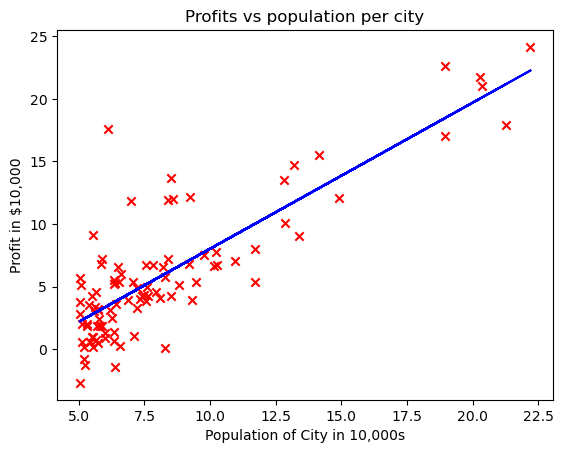

In [18]:
plt.plot(x_train, predicted, c='b')

plt.scatter(x_train, y_train, marker='x', c='r')

# Set the title
plt.title("Profits vs population per city")
# Set the y_axis label
plt.ylabel("Profit in $10,000")
# Set the x_axis label
plt.xlabel("Population of City in 10,000s")
plt.show()

In [19]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1 * 10000))

For population = 35,000, we predict a profit of $4519.77
